# YouTube Trending Videos Analysis

In [1]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
IN = pd.read_csv("INvideos.csv")

In [3]:
IN

video_id trending_date  \
0      kzwfHumJyYc      17.14.11   
1      zUZ1z7FwLc8      17.14.11   
2      10L1hZ9qa58      17.14.11   
3      N1vE8iiEg64      17.14.11   
4      kJzGH0PVQHQ      17.14.11   
...            ...           ...   
37347  iNHecA3PJCo      18.14.06   
37348  dpPmPbhcslM      18.14.06   
37349  mV6aztP58f8      18.14.06   
37350  qxqDNP1bDEw      18.14.06   
37351  wERgpPK44w0      18.14.06   

                                                   title       channel_title  \
0      Sharry Mann: Cute Munda ( Song Teaser) | Parmi...     Lokdhun Punjabi   
1      पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...             HJ NEWS   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...                TFPC   
3                         Eruma Saani | Tamil vs English         Eruma Saani   
4      why Samantha became EMOTIONAL @ Samantha naga ...          Filmylooks   
...                                                  ...                 ...   
37347  फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...      RDC Rajasthani   
37348                         Seetha | Flowers | Ep# 364          Flowers TV   
37349  Bhramanam I Episode 87 - 12 June 2018 I Mazhav...   Mazhavil Manorama   
37350  Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...           Tarang TV   
37351  Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...  Suresh Productions   

       category_id              publish_time  \
0                1  2017-11-12T12:20:39.000Z   
1               25  2017-11-13T05:43:56.000Z   
2               24  2017-11-12T15:48:08.000Z   
3               23  2017-11-12T07:08:48.000Z   
4               24  2017-11-13T01:14:16.000Z   
...            ...                       ...   
37347           23  2018-06-13T08:01:11.000Z   
37348           24  2018-06-13T11:30:04.000Z   
37349           24  2018-06-13T05:00:02.000Z   
37350           24  2018-06-13T15:07:49.000Z   
37351           24  2018-06-10T04:29:54.000Z   

                                                    tags    views  likes  \
0      sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
1      पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   590101    735   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011   
3      Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...  1242680  70353   
4      Filmylooks|"latest news"|"telugu movies"|"telu...   464015    492   
...                                                  ...      ...    ...   
37347  twinkle vaishnav comedy|"twinkle vaishnav"|"tw...   214378   3291   
37348  flowers serials|"actress"|"malayalam serials"|...   406828   1726   
37349  mazhavil manorama|"bhramanam full episode"|"gt...   386319   1216   
37350  tarang|"tarang tv"|"tarang tv online"|"tarang ...   130263    698   
37351  Ee Nagaraniki Emaindi|"Ee Nagaraniki Emaindi T...  1278249  22466   

       dislikes  comment_count  \
0           798            882   
1           904              0   
2           243            149   
3          1624           2684   
4           293             66   
...         ...            ...   
37347       404            196   
37348       478           1428   
37349       453            697   
37350       115             65   
37351      1609           1205   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg              False   
1      https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg               True   
2      https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg              False   
3      https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg              False   
4      https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg              False   
...                                               ...                ...   
37347  https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg              False   
37348  https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg              False   
37349  https://i.ytimg.com/vi/mV6

In [4]:
IN.shape

(37352, 16)

In [5]:
IN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [6]:
#Converting trending_date, publish_time to Datetime format
IN["trending_date"] = pd.to_datetime(IN["trending_date"],format="%y.%d.%m")
IN["publish_time"] = pd.to_datetime(IN["publish_time"])

In [7]:
IN.describe().apply(lambda s: s.apply(lambda x: format(x, "f")))

category_id             views           likes        dislikes  \
count  37352.000000      37352.000000    37352.000000    37352.000000   
mean      21.576596    1060477.645882    27082.717659     1665.081977   
std        6.556593    3184932.053381    97145.095131    16076.174539   
min        1.000000       4024.000000        0.000000        0.000000   
25%       23.000000     123915.500000      864.000000      108.000000   
50%       24.000000     304586.000000     3069.000000      326.000000   
75%       24.000000     799291.250000    13774.250000     1019.250000   
max       43.000000  125432237.000000  2912710.000000  1545017.000000   

       comment_count  
count   37352.000000  
mean     2676.997430  
std     14868.317130  
min         0.000000  
25%        81.000000  
50%       329.000000  
75%      1285.000000  
max    827755.000000

In [8]:
IN.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64

In [9]:
IN[IN["description"].isnull()]

video_id trending_date  \
24     znOC3IU0dF8    2017-11-14   
25     z3V9LUA6VQM    2017-11-14   
36     qP67alYxSiU    2017-11-14   
78     sOwXjFMy17Y    2017-11-14   
158    ifqJNMRupEU    2017-11-14   
...            ...           ...   
36936  fUoc7FMuwdY    2018-06-12   
36986  mu_Iw1yzMPg    2018-06-12   
37060  mu_Iw1yzMPg    2018-06-13   
37115  r6wbTb3uRl0    2018-06-13   
37287  mu_Iw1yzMPg    2018-06-14   

                                                   title  \
24     Hero Tarun at #ChaySamWeddingReception | Saman...   
25     ఆమె బ్యాంకు అకౌంట్ లో పొరపాటున 125 కోట్లు జమయా...   
36     కెమెరాలో రికార్డ్ అయిన ఈ అద్భుతాన్ని చూస్తే ఆశ...   
78     నవంబర్ 13   (చివరి కార్తిక సోమవారం) ఇది ఒక్కటి...   
158    பாகுபலி பிரபாசை போன்று யானையிடம் செய்ய முயன்றவ...   
...                                                  ...   
36936  CET Common Eligibility test & Its Effect on st...   
36986                                 13th June 8-10 PM.   
37060                                 13th June 8-10 PM.   
37115  Strategy to CRACK SSC CGL By AMEEN AHMAD SCORE...   
37287                                 13th June 8-10 PM.   

                channel_title  category_id              publish_time  \
24                News Mantra           24 2017-11-13 06:03:49+00:00   
25                      OmFut           24 2017-11-12 09:45:58+00:00   
36             HOTNEWS TELUGU           26 2017-11-12 03:53:49+00:00   
78               local telugu           22 2017-11-13 03:59:37+00:00   
158                News VIdeo           22 2017-11-13 12:10:32+00:00   
...                       ...          ...                       ...   
36936  CGL APTITUDE PATHSHALA           27 2018-06-11 02:04:22+00:00   
36986         ColorsTV Promos           24 2018-06-11 06:57:37+00:00   
37060         ColorsTV Promos           24 2018-06-11 06:57:37+00:00   
37115  CGL APTITUDE PATHSHALA           27 2018-06-12 02:30:00+00:00   
37287         ColorsTV Promos           24 2018-06-11 06:57:37+00:00   

                                                    tags   views  likes  \
24     Hero Tarun At Samantha Naga Chaitanya Wedding ...   55178     45   
25                                                [none]  236710    858   
36     Miracles Caught on Camera|"Miracles Caught on ...  128851      0   
78                                                [none]   55523    220   
158                                               [none]    7573      1   
...                                                  ...     ...    ...   
36936  SSC CGL|"SSC CHSL"|"SSC CGL 2018"|"BANK PO"|"I...   54429   1311   
36986               colors tv|"colorstv"|"hindi serials"  403727   2558   
37060               colors tv|"colorstv"|"hindi serials"  602529   2965   
37115  SSC CGL|"SSC CHSL"|"SSC CGL 2018"|"BANK PO"|"I...   62111   3133   
37287               colors tv|"colorstv"|"hindi serials"  685025   3083   

       dislikes  comment_count  \
24           94             15   
25          197             66   
36            0              0   
78           41              5   
158           1              2   
...         ...            ...   
36936       131            625   
36986        96            201   
37060       155            239   
37115       108            735   
37287       177            241   

                                       thumbnail_link  comments_disabled  \
24     https://i.ytimg.com/vi/znOC3IU0dF8/default.jpg              False   
25     https://i.ytimg.com/vi/z3V9LUA6VQM/default.jpg              False   
36     https://i.ytimg.com/vi/qP67alYxSiU/default.jpg               True   
78     https://i.ytimg.com/vi/sOwXjFMy17Y/default.jpg              False   
158    https://i.ytimg.com/vi/ifqJNMRupEU/default.jpg              False   
...                                               ...                ...   
36936  https://i.ytimg.com/vi/fUoc7FMuwdY/default.jpg              False   
36986  https://i.ytimg.com/vi/mu_Iw1yzMPg/default.jpg              False 

**After going through the likns, we get to know that the Videos don't include any description.**

In [10]:
IN.loc[IN["description"].isnull(),"description"] = " "

**In the tags column, we need to remove '|' and ' " ' .**

In [11]:
IN["tags"] = IN["tags"].str.replace('|',",").str.replace('"',"")

**Reading the json file that contains the category of the video.**

In [12]:
IN_Category = pd.read_json("IN_category_id.json")

**Extracting the Categories**

In [13]:
ID_G = []
keys = []
items = []
for i in list(IN_Category["items"]):
    ID = i["id"]
    genre = i["snippet"]["title"]
    ID_G.append((ID,genre))

**The Categories doesn't contain the 29th Category. Using the links, I examined many videos with 29th Category and most of them were related to Events and Motivation.**

In [14]:
ID_G.append(('29','Events and Motivational'))

**Creating a new Column named video_type which includes the Category Name of the Video**

In [15]:
IN["video_type"]= [dict(ID_G)[x] for x in list(map(str,IN["category_id"]))]

**Creating another new Column that contains the no. of Days since the video is trending.**

In [16]:
#Here, we could've used video_id. But we see that video_id of more that 500 records is missing.
#So, it would be wise to use title instead.
IN["trending_since(in days)"] = [len(IN[IN["title"]==i]) for i in IN["title"]]

In [17]:
#Records contain everyday updates of each trending video. We will drop all the duplicate records and keep the last one since, it contains total number of likes, dislikes, views,and comm
IN = IN.drop_duplicates(subset="title",keep="last")

In [18]:
IN

video_id trending_date  \
6      7MxiQ4v0EnE    2017-11-14   
12     Prb_osSVE0M    2017-11-14   
13     KHxdrECEsD0    2017-11-14   
16     ep3SLMuRbvg    2017-11-14   
22     1kuJkA9usqg    2017-11-14   
...            ...           ...   
37347  iNHecA3PJCo    2018-06-14   
37348  dpPmPbhcslM    2018-06-14   
37349  mV6aztP58f8    2018-06-14   
37350  qxqDNP1bDEw    2018-06-14   
37351  wERgpPK44w0    2018-06-14   

                                                   title  \
6      Daang ( Full Video ) | Mankirt Aulakh | Sukh S...   
12     Renu Desai Gives Rating For Pawan kalyan As Hu...   
13     Peehu Srivastav Performs On Daiya Yeh Main kah...   
16                   TYPES OF STUDENTS- | Elvish Yadav |   
22                     Deivamagal Episode 1387, 13/11/17   
...                                                  ...   
37347  फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...   
37348                         Seetha | Flowers | Ep# 364   
37349  Bhramanam I Episode 87 - 12 June 2018 I Mazhav...   
37350  Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...   
37351  Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...   

              channel_title  category_id              publish_time  \
6             Speed Records           10 2017-11-11 16:41:15+00:00   
12               ABN Telugu           25 2017-11-13 09:51:59+00:00   
13     The Voice India Kids           24 2017-11-11 19:19:13+00:00   
16             Elvish yadav           23 2017-11-13 11:26:02+00:00   
22                VikatanTV           24 2017-11-13 15:00:01+00:00   
...                     ...          ...                       ...   
37347        RDC Rajasthani           23 2018-06-13 08:01:11+00:00   
37348            Flowers TV           24 2018-06-13 11:30:04+00:00   
37349     Mazhavil Manorama           24 2018-06-13 05:00:02+00:00   
37350             Tarang TV           24 2018-06-13 15:07:49+00:00   
37351    Suresh Productions           24 2018-06-10 04:29:54+00:00   

                                                    tags    views   likes  \
6      punjabi songs,punjabi bhangra,punjabi music,pu...  5718766  127477   
12     Resnu desai,actress renu desai,pawan kalyan wi...   156085     716   
13     the voice of india,TVOI,the voice of india kid...   472413    2611   
16     TYPES OF STUDENTS ELVISH YADAV,elvish yadav,el...   344545   25717   
22     deivamagal,deiva magal,deiva magal serial,Vika...   387221    2159   
...                                                  ...      ...     ...   
37347  twinkle vaishnav comedy,twinkle vaishnav,twink...   214378    3291   
37348  flowers serials,actress,malayalam serials,flow...   406828    1726   
37349  mazhavil manorama,bhramanam full episode,gtv c...   386319    1216   
37350  tarang,tarang tv,tarang tv online,tarang tv se...   130263     698   
37351  Ee Nagaraniki Emaindi,Ee Nagaraniki Emaindi Tr...  1278249   22466   

       dislikes  comment_count  \
6          7134           8063   
12           53              0   
13          250            174   
16          417           2870   
22         1214            711   
...         ...            ...   
37347       404            196   
37348       478           1428   
37349       453            697   
37350       115             65   
37351      1609           1205   

                                       thumbnail_link  comments_disabled  \
6      https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg              False   
12     https://i.ytimg.com/vi/Prb_osSVE0M/default.jpg               True   
13     https://i.ytimg.com/vi/KHxdrECEsD0/default.jpg              False   
16     https://i.ytimg.com/vi/ep3SLMuRbvg/default.jpg              False   
22     https://i.ytimg.com/vi/1kuJkA9usqg/default.jpg              False   
...                                               ...                ...   
37347  https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg              False   
37348  https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg              False 

In [19]:
IN.reset_index(drop=True,inplace=True)

**Creating a new Column that contains all the text in the Video [Title, Tags, Description].**

In [20]:
IN["text"] = IN["title"]+" "+IN["tags"]+" "+IN["description"]

<ipython-input-20-0acac8383781>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IN["text"] = IN["title"]+" "+IN["tags"]+" "+IN["description"]


**Creating a new column that contains the month in which video goes trending.**

In [21]:
IN["trending_month"] = pd.DatetimeIndex(IN['trending_date']).month

<ipython-input-21-069ea1a65bc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IN["trending_month"] = pd.DatetimeIndex(IN['trending_date']).month


**Rearranging the required columns**

In [22]:
IN.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'video_type',
       'trending_since(in days)', 'text', 'trending_month'],
      dtype='object')

In [23]:
cols = ['trending_date','trending_since(in days)', 'trending_month', 'title',
        'channel_title', 'video_type', 'publish_time', 'tags', 'views',
        'likes', 'dislikes', 'comment_count', 'thumbnail_link',
        'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
        'description', 'text']

In [24]:
IN = IN[cols]

Creating a copy of the DDataFrane so that we can manipulate the data further without losing the original data.

In [25]:
df = IN.copy()

In [26]:
df

trending_date  trending_since(in days)  trending_month  \
0        2017-11-14                        1              11   
1        2017-11-14                        1              11   
2        2017-11-14                        1              11   
3        2017-11-14                        1              11   
4        2017-11-14                        1              11   
...             ...                      ...             ...   
16716    2018-06-14                        2               6   
16717    2018-06-14                        2               6   
16718    2018-06-14                        2               6   
16719    2018-06-14                        2               6   
16720    2018-06-14                       10               6   

                                                   title  \
0      Daang ( Full Video ) | Mankirt Aulakh | Sukh S...   
1      Renu Desai Gives Rating For Pawan kalyan As Hu...   
2      Peehu Srivastav Performs On Daiya Yeh Main kah...   
3                    TYPES OF STUDENTS- | Elvish Yadav |   
4                      Deivamagal Episode 1387, 13/11/17   
...                                                  ...   
16716  फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...   
16717                         Seetha | Flowers | Ep# 364   
16718  Bhramanam I Episode 87 - 12 June 2018 I Mazhav...   
16719  Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...   
16720  Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...   

              channel_title       video_type              publish_time  \
0             Speed Records            Music 2017-11-11 16:41:15+00:00   
1                ABN Telugu  News & Politics 2017-11-13 09:51:59+00:00   
2      The Voice India Kids    Entertainment 2017-11-11 19:19:13+00:00   
3              Elvish yadav           Comedy 2017-11-13 11:26:02+00:00   
4                 VikatanTV    Entertainment 2017-11-13 15:00:01+00:00   
...                     ...              ...                       ...   
16716        RDC Rajasthani           Comedy 2018-06-13 08:01:11+00:00   
16717            Flowers TV    Entertainment 2018-06-13 11:30:04+00:00   
16718     Mazhavil Manorama    Entertainment 2018-06-13 05:00:02+00:00   
16719             Tarang TV    Entertainment 2018-06-13 15:07:49+00:00   
16720    Suresh Productions    Entertainment 2018-06-10 04:29:54+00:00   

                                                    tags    views   likes  \
0      punjabi songs,punjabi bhangra,punjabi music,pu...  5718766  127477   
1      Resnu desai,actress renu desai,pawan kalyan wi...   156085     716   
2      the voice of india,TVOI,the voice of india kid...   472413    2611   
3      TYPES OF STUDENTS ELVISH YADAV,elvish yadav,el...   344545   25717   
4      deivamagal,deiva magal,deiva magal serial,Vika...   387221    2159   
...                                                  ...      ...     ...   
16716  twinkle vaishnav comedy,twinkle vaishnav,twink...   214378    3291   
16717  flowers serials,actress,malayalam serials,flow...   406828    1726   
16718  mazhavil manorama,bhramanam full episode,gtv c...   386319    1216   
16719  tarang,tarang tv,tarang tv online,tarang tv se...   130263     698   
16720  Ee Nagaraniki Emaindi,Ee Nagaraniki Emaindi Tr...  1278249   22466   

       dislikes  comment_count  \
0          7134           8063   
1            53              0   
2           250            174   
3           417           2870   
4          1214            711   
...         ...            ...   
16716       404            196   
16717       478           1428   
16718       453            697   
16719       115             65   
16720      1609           1205   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg              False   
1      https://i.ytimg.com/vi/Prb_osSVE0M/default.jpg               True   
2      https://i.ytimg.com/vi/KHxdrECEsD0/default.jpg            

# **EXPLORATORY DATA ANALYSIS**

## Univariate Analysis

**Lets go through the Numerical Features first**

In [27]:
df.describe()

trending_since(in days)  trending_month         views         likes  \
count             16721.000000    16721.000000  1.672100e+04  1.672100e+04   
mean                  2.233838        5.348065  6.895379e+05  1.459441e+04   
std                   1.691657        4.037594  2.361315e+06  6.655272e+04   
min                   1.000000        1.000000  4.024000e+03  0.000000e+00   
25%                   1.000000        2.000000  8.896100e+04  5.650000e+02   
50%                   2.000000        4.000000  2.060640e+05  1.765000e+03   
75%                   3.000000       11.000000  5.308770e+05  6.540000e+03   
max                  19.000000       12.000000  1.254322e+08  2.912710e+06   

           dislikes  comment_count  
count  1.672100e+04   16721.000000  
mean   9.601096e+02    1486.945278  
std    1.249234e+04   10301.699636  
min    0.000000e+00       0.000000  
25%    7.000000e+01      47.000000  
50%    1.950000e+02     197.000000  
75%    5.960000e+02     711.000000  
max    1.545017e+06  807558.000000

G:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

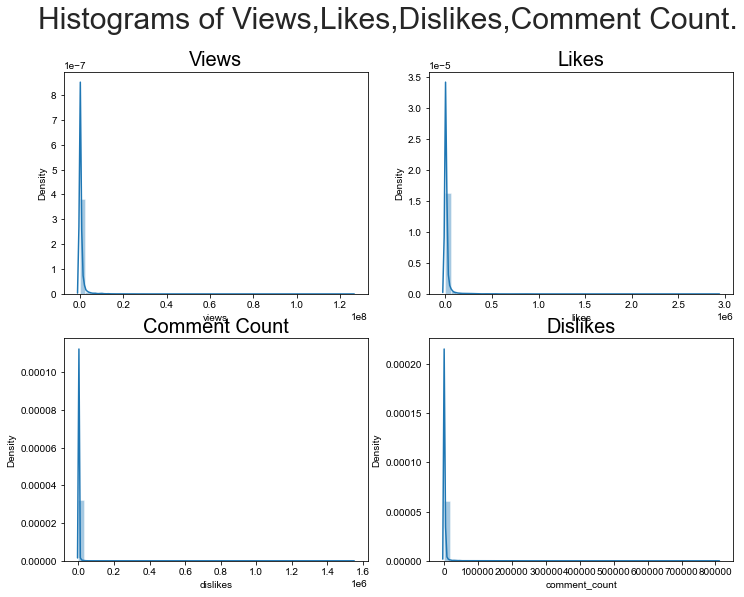

In [28]:
f, axes = plt.subplots(2,2,figsize=(12,9))
sns.set_style("whitegrid")
f.suptitle('Histograms of Views,Likes,Dislikes,Comment Count.', fontsize=30)

sns.distplot(df["views"], ax=axes[0, 0])
axes[0,0].set_title('Views',size=20)

sns.distplot(df["likes"], ax=axes[0, 1])
axes[0,1].set_title('Likes',size=20)

sns.distplot(df["dislikes"], ax=axes[1, 0])
axes[1,1].set_title('Dislikes',size=20)

sns.distplot(df["comment_count"], ax=axes[1, 1])
axes[1,0].set_title('Comment Count',size=20)

plt.show()

**The histogram is not very clear. Lets get the values of Quantiles these columns.**

In [29]:
#Creating a dictionary to get a DataFrame of the Quantiles
d = dict([(f"{i}",np.quantile([df[f"{i}"]],[0,0.1,0.25,0.5,0.75,0.9,0.95,1])) for i in ["views","likes","dislikes","comment_count"]])
pd.DataFrame(d , index = [0,0.1,0.25,0.5,0.75,0.9,0.95,1])

views      likes   dislikes  comment_count
0.00       4024.0        0.0        0.0            0.0
0.10      44617.0      192.0       28.0           11.0
0.25      88961.0      565.0       70.0           47.0
0.50     206064.0     1765.0      195.0          197.0
0.75     530877.0     6540.0      596.0          711.0
0.90    1320054.0    25462.0     1631.0         2276.0
0.95    2327719.0    55382.0     3039.0         4541.0
1.00  125432237.0  2912710.0  1545017.0       807558.0

**Now lets look at our Categorical Features i.e. video_type, comments_disabled, ratings_disabled and video_error_or_removed**

G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


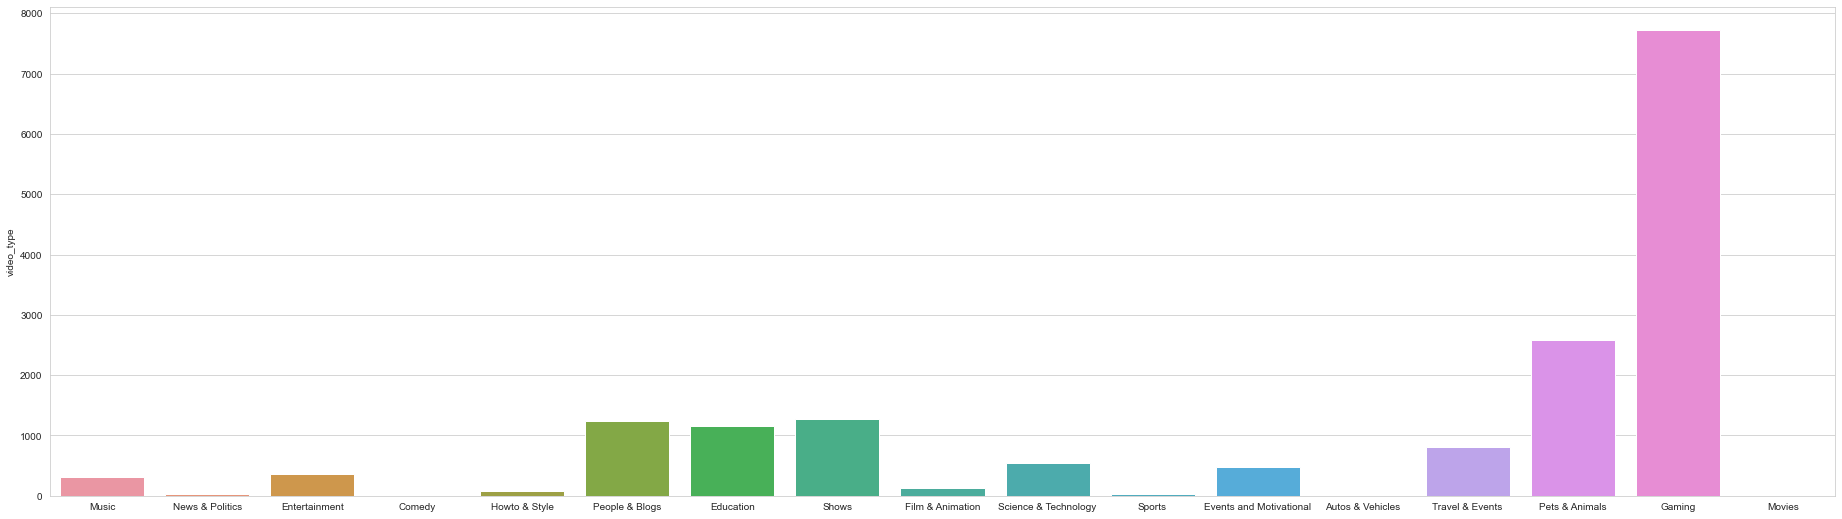

In [30]:
plt.figure(figsize=(32,9))
sns.barplot(df["video_type"].unique(),df["video_type"].value_counts(sort=False))
plt.show()

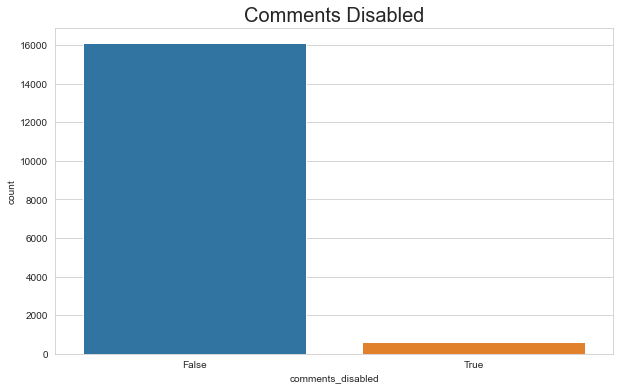

In [31]:
plt.figure(figsize = (10,6))

sns.countplot(x='comments_disabled', data=df)
plt.title("Comments Disabled", fontsize=20)

plt.show()

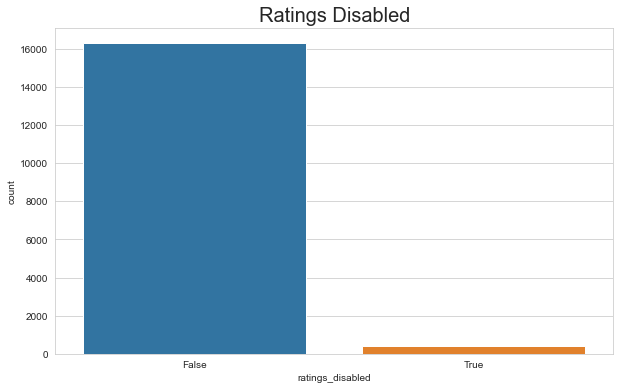

In [32]:
plt.figure(figsize = (10,6))

sns.countplot(x='ratings_disabled', data=df)
plt.title("Ratings Disabled", fontsize=20)

plt.show()

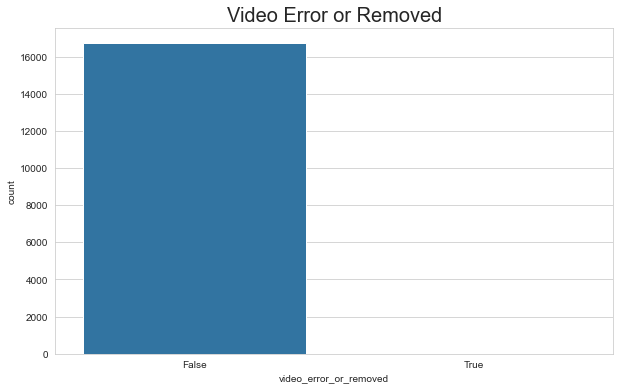

In [33]:
plt.figure(figsize = (10,6))

sns.countplot(x='video_error_or_removed', data=df)
plt.title("Video Error or Removed", fontsize=20)

plt.show()

## Bivariate Analysis

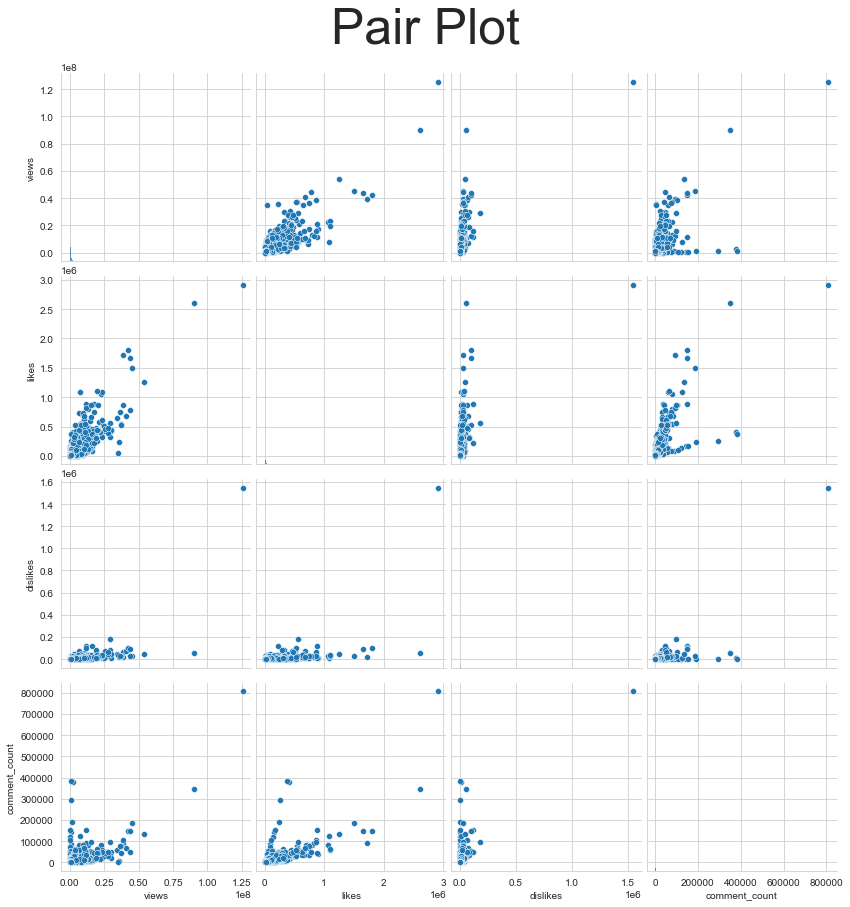

In [34]:
sns.pairplot(df.loc[:,["views","likes","dislikes","comment_count"]],height=3).fig.suptitle("Pair Plot",y = 1.05, fontsize=50)
plt.show()

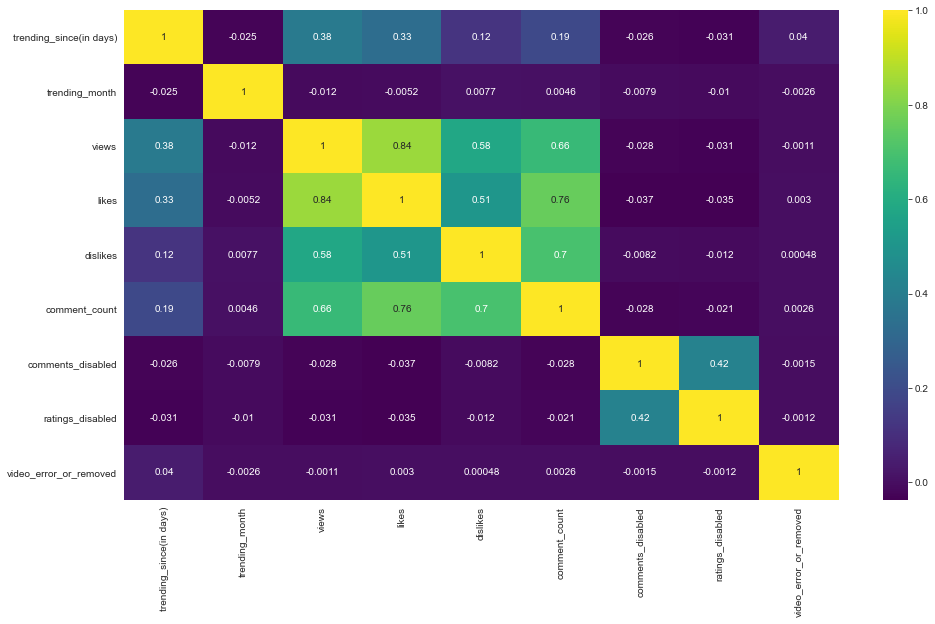

In [35]:
plt.figure(figsize = (16,9))
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.show()

## NOW LET'S DRAW SOME INSIGHTS FROM THE DATA

### **WHAT KIND OF VIDEOS ARE TRENDING IN INDIA ???**

G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


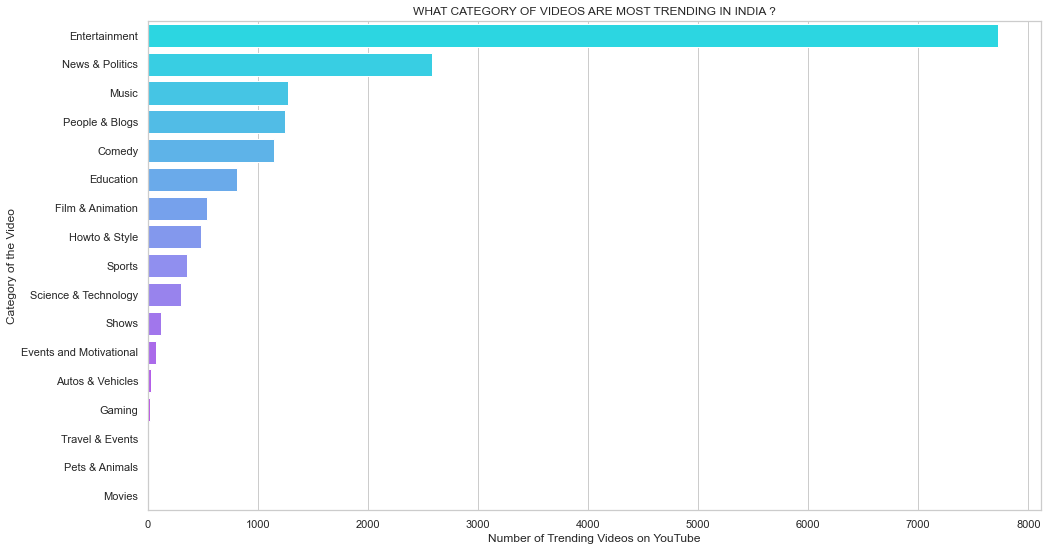

In [36]:
#List of all unique channel title
cats = df["video_type"].unique()
#Sum of Like received on each video of various channels
vals = np.array([len(df[df["video_type"]==i]) for i in df["video_type"].unique()])
#Soring by descending order and storing their index no.
sort = cats[np.argsort(vals)[::-1]]
#Plotting the Bar Graph
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")
sns.barplot(vals,cats,orient='h',palette="cool",order=sort)
plt.xlabel("Number of Trending Videos on YouTube")
plt.ylabel("Category of the Video")
plt.title("WHAT CATEGORY OF VIDEOS ARE MOST TRENDING IN INDIA ?")
plt.show()

### **WHICH CATEGORY DO INDIANS VIEW THE MOST ?**

G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


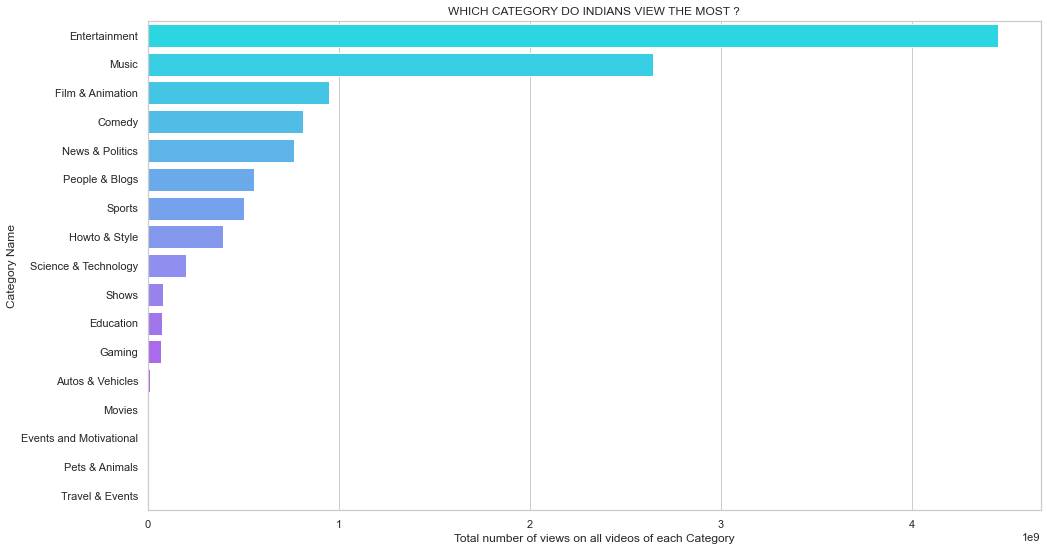

In [37]:
#List of all unique channel title
cats = df["video_type"].unique()
#Sum of Like received on each video of various channels
vals = np.array([df.groupby("video_type").get_group(i)["views"].sum() for i in cats])
#Soring by descending order and storing their index no.
sort = np.argsort(vals)[::-1]
#Ordering the list of cats and vals according to the indexes stored and choosing top 25 values
cats=cats[sort][:25]
vals=vals[sort][:25]
#Plotting the Bar Graph
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")
sns.barplot(vals,cats,orient='h',palette="cool")
plt.xlabel("Total number of views on all videos of each Category")
plt.ylabel("Category Name")
plt.title("WHICH CATEGORY DO INDIANS VIEW THE MOST ?")
plt.show()

### **WHICH CATEGORY DO INDIANS LIKE THE MOST ???**

G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


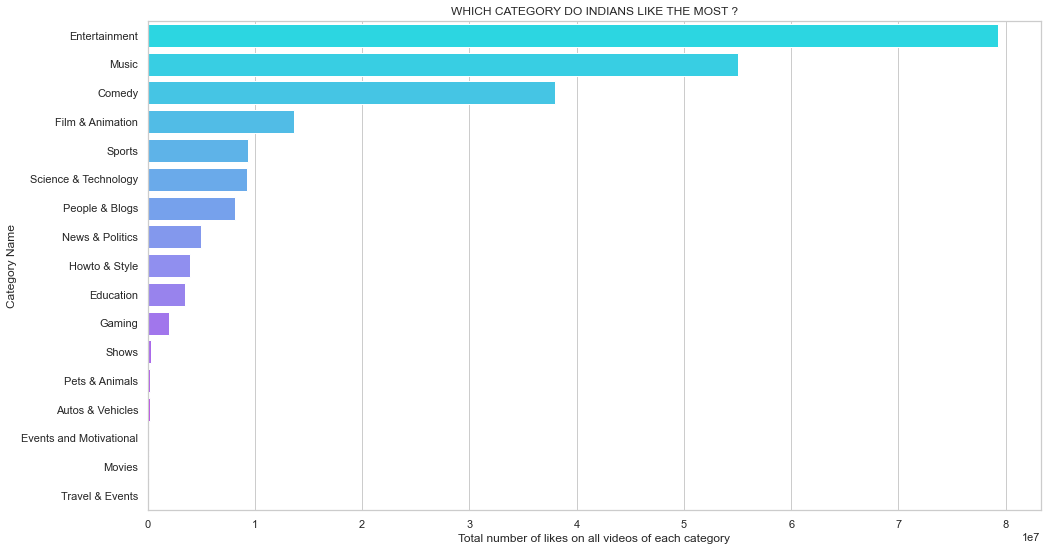

In [38]:
#List of all unique channel title
cats = df["video_type"].unique()
#Sum of Like received on each video of various channels
vals = np.array([(df.groupby("video_type").get_group(i)["likes"]-df.groupby("video_type").get_group(i)["dislikes"]).sum() for i in cats])
#Soring by descending order and storing their index no.
sort = np.argsort(vals)[::-1]
#Ordering the list of cats and vals according to the indexes stored and choosing top 25 values
cats=cats[sort][:25]
vals=vals[sort][:25]
#Plotting the Bar Graph
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")
sns.barplot(vals,cats,orient='h',palette="cool")
plt.xlabel("Total number of likes on all videos of each category")
plt.ylabel("Category Name")
plt.title("WHICH CATEGORY DO INDIANS LIKE THE MOST ?")
plt.show()

### **ON WHICH CATEGORY DO INDIANS COMMENT THE MOST ???**

G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


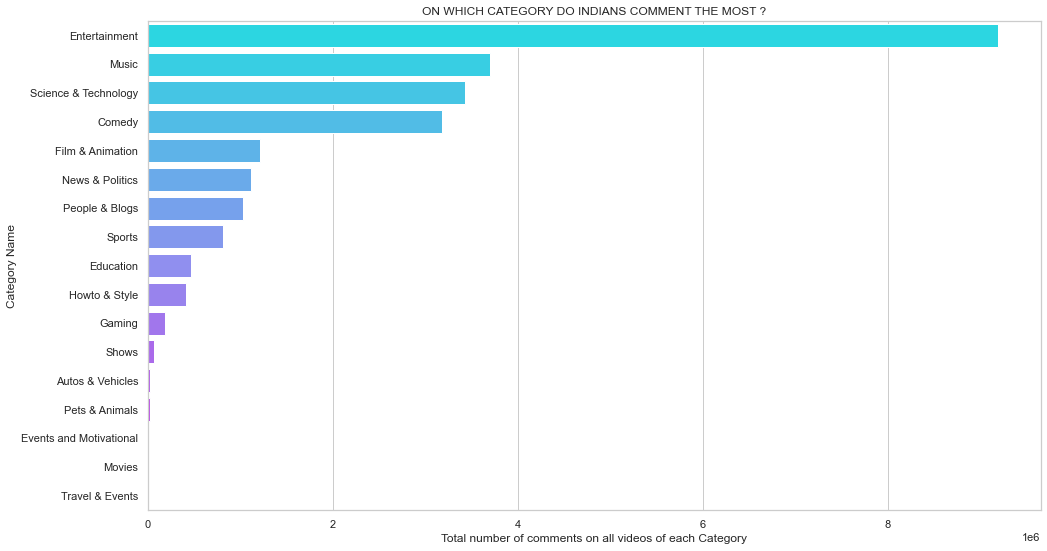

In [39]:
#List of all unique channel title
cats = df["video_type"].unique()
#Sum of Like received on each video of various channels
vals = np.array([df.groupby("video_type").get_group(i)["comment_count"].sum() for i in cats])
#Soring by descending order and storing their index no.
sort = np.argsort(vals)[::-1]
#Ordering the list of cats and vals according to the indexes stored and choosing top 25 values
cats=cats[sort][:25]
vals=vals[sort][:25]
#Plotting the Bar Graph
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")
sns.barplot(vals,cats,orient='h',palette="cool")
plt.xlabel("Total number of comments on all videos of each Category")
plt.ylabel("Category Name")
plt.title("ON WHICH CATEGORY DO INDIANS COMMENT THE MOST ?")
plt.show()

### **WHICH CATEGORY DO INDIAND DISLIKE THE MOST ???**

G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


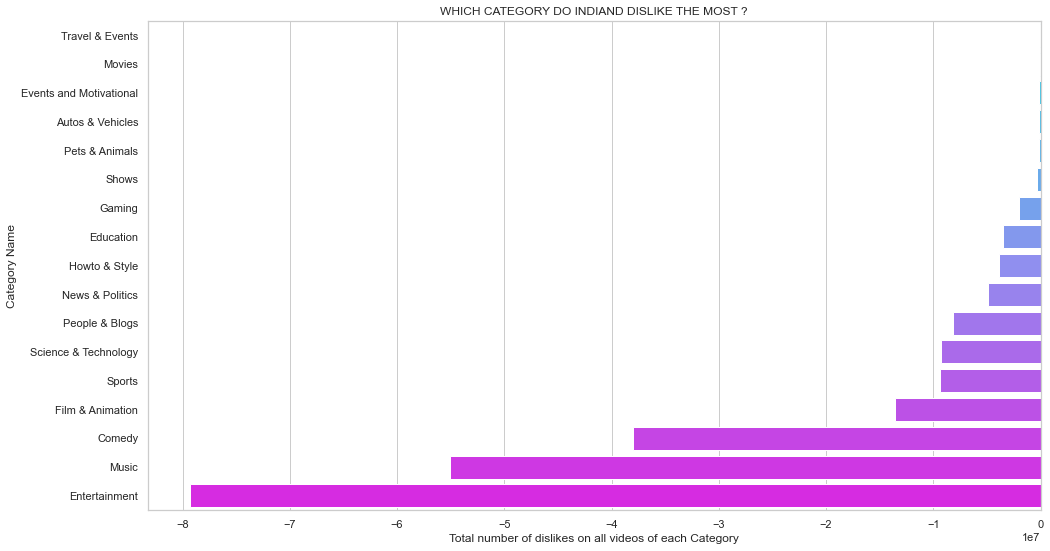

In [40]:
#List of all unique channel title
cats = df["video_type"].unique()
#Sum of Like received on each video of various channels
vals = np.array([(df.groupby("video_type").get_group(i)["dislikes"]-df.groupby("video_type").get_group(i)["likes"]).sum() for i in cats])
#Soring by descending order and storing their index no.
sort = np.argsort(vals)[::-1]
#Ordering the list of cats and vals according to the indexes stored and choosing top 25 values
cats=cats[sort][:25]
vals=vals[sort][:25]
#Plotting the Bar Graph
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")
sns.barplot(vals,cats,orient='h',palette="cool")
plt.xlabel("Total number of dislikes on all videos of each Category")
plt.ylabel("Category Name")
plt.title("WHICH CATEGORY DO INDIAND DISLIKE THE MOST ?")
plt.show()

### **WHICH CHANNEL IS MOST TRENDING ON YOUTUBE IN INDIA ???**

G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


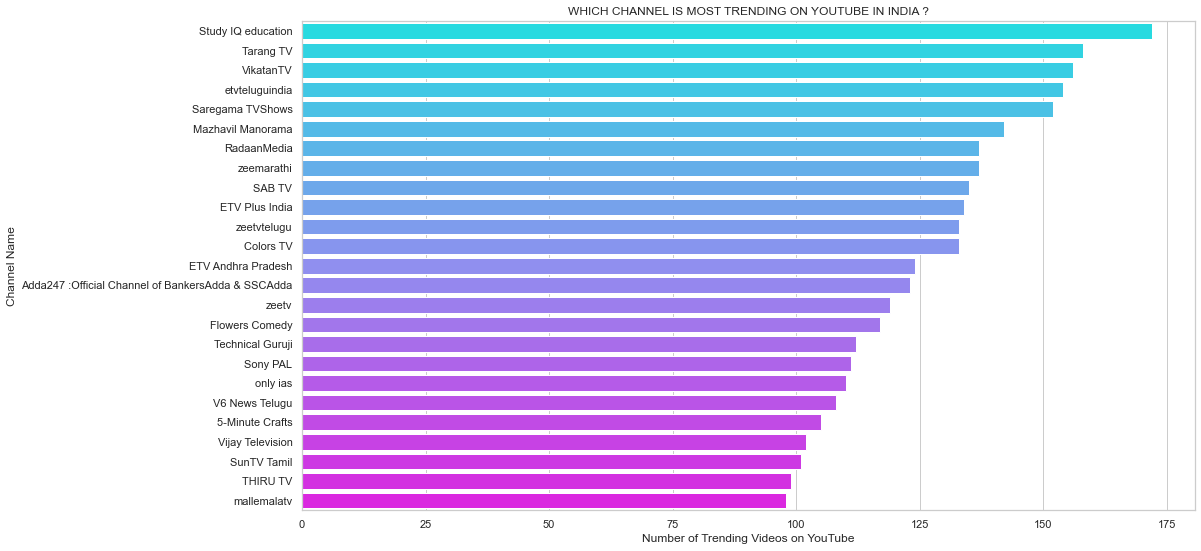

In [41]:
#List of all unique channel title
cats = df["channel_title"].unique()
#Sum of Like received on each video of various channels
vals = np.array([len(df[df["channel_title"]==i]) for i in df["channel_title"].unique()])
#Soring by descending order and storing their index no.
sort = np.argsort(vals)[::-1]
#Ordering the list of cats and vals according to the indexes stored and choosing top 25 values
cats=cats[sort][:25]
vals=vals[sort][:25]
#Plotting the Bar Graph
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")
sns.barplot(vals,cats,orient='h',palette="cool")
plt.xlabel("Number of Trending Videos on YouTube")
plt.ylabel("Channel Name")
plt.title("WHICH CHANNEL IS MOST TRENDING ON YOUTUBE IN INDIA ?")
plt.show()

### **WHICH CHANNEL DO INDIANS VIEW THE MOST ???**

G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


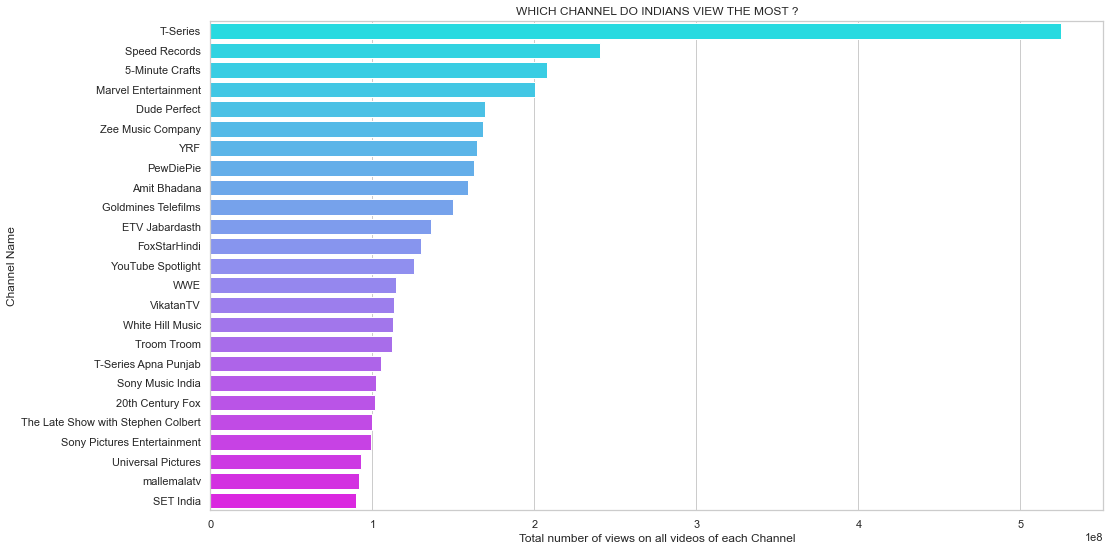

In [42]:
#List of all unique channel title
cats = df["channel_title"].unique()
#Sum of Like received on each video of various channels
vals = np.array([df.groupby("channel_title").get_group(i)["views"].sum() for i in cats])
#Soring by descending order and storing their index no.
sort = np.argsort(vals)[::-1]
#Ordering the list of cats and vals according to the indexes stored and choosing top 25 values
cats=cats[sort][:25]
vals=vals[sort][:25]
#Plotting the Bar Graph
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")
sns.barplot(vals,cats,orient='h',palette="cool")
plt.xlabel("Total number of views on all videos of each Channel")
plt.ylabel("Channel Name")
plt.title("WHICH CHANNEL DO INDIANS VIEW THE MOST ?")
plt.show()

### **WHICH CHANNEL DO INDIANS LIKE THE MOST ???**

G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


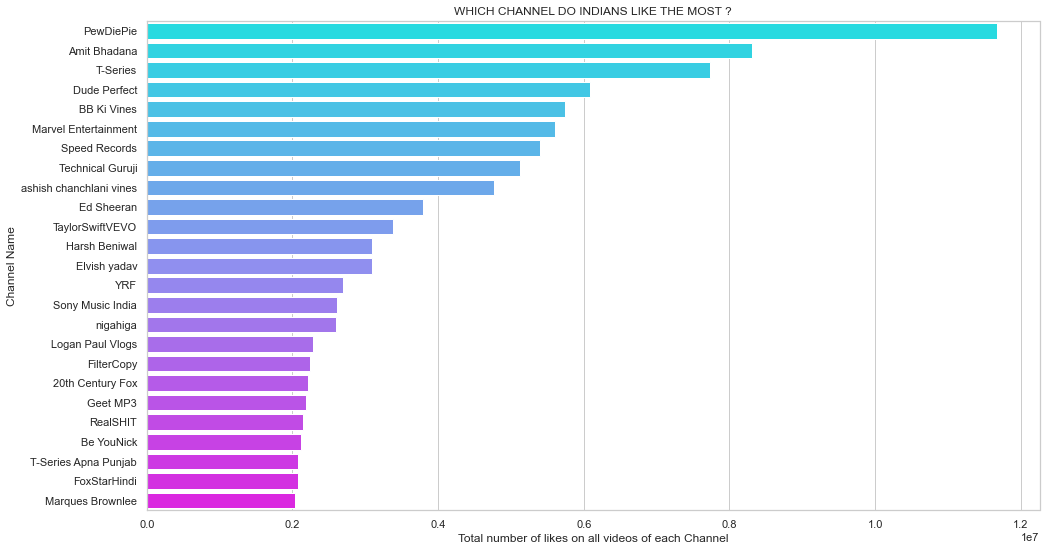

In [43]:
#List of all unique channel title
cats = df["channel_title"].unique()
#Sum of Like received on each video of various channels
vals = np.array([(df.groupby("channel_title").get_group(i)["likes"]-df.groupby("channel_title").get_group(i)["dislikes"]).sum() for i in cats])
#Soring by descending order and storing their index no.
sort = np.argsort(vals)[::-1]
#Ordering the list of cats and vals according to the indexes stored and choosing top 25 values
cats=cats[sort][:25]
vals=vals[sort][:25]
#Plotting the Bar Graph
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")
sns.barplot(vals,cats,orient='h',palette="cool")
plt.xlabel("Total number of likes on all videos of each Channel")
plt.ylabel("Channel Name")
plt.title("WHICH CHANNEL DO INDIANS LIKE THE MOST ?")
plt.show()

### **ON WHICH CHANNEL DO INDIANS COMMENT THE MOST ???**

G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


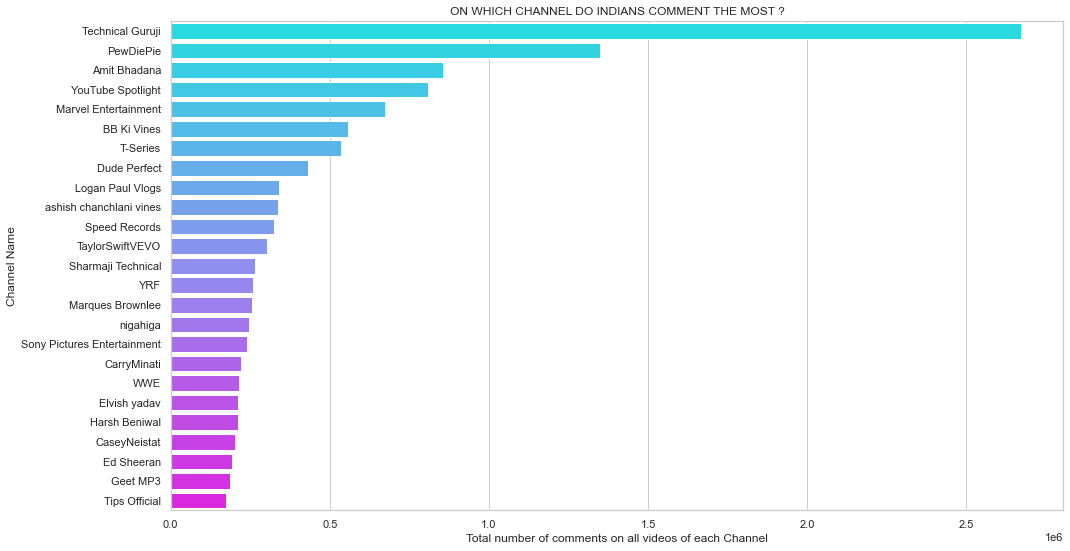

In [44]:
#List of all unique channel title
cats = df["channel_title"].unique()
#Sum of Like received on each video of various channels
vals = np.array([df.groupby("channel_title").get_group(i)["comment_count"].sum() for i in cats])
#Soring by descending order and storing their index no.
sort = np.argsort(vals)[::-1]
#Ordering the list of cats and vals according to the indexes stored and choosing top 25 values
cats=cats[sort][:25]
vals=vals[sort][:25]
#Plotting the Bar Graph
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")
sns.barplot(vals,cats,orient='h',palette="cool")
plt.xlabel("Total number of comments on all videos of each Channel")
plt.ylabel("Channel Name")
plt.title("ON WHICH CHANNEL DO INDIANS COMMENT THE MOST ?")
plt.show()

### **WHICH CHANNEL DO INDIANS DISLIKE THE MOST ???**

G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


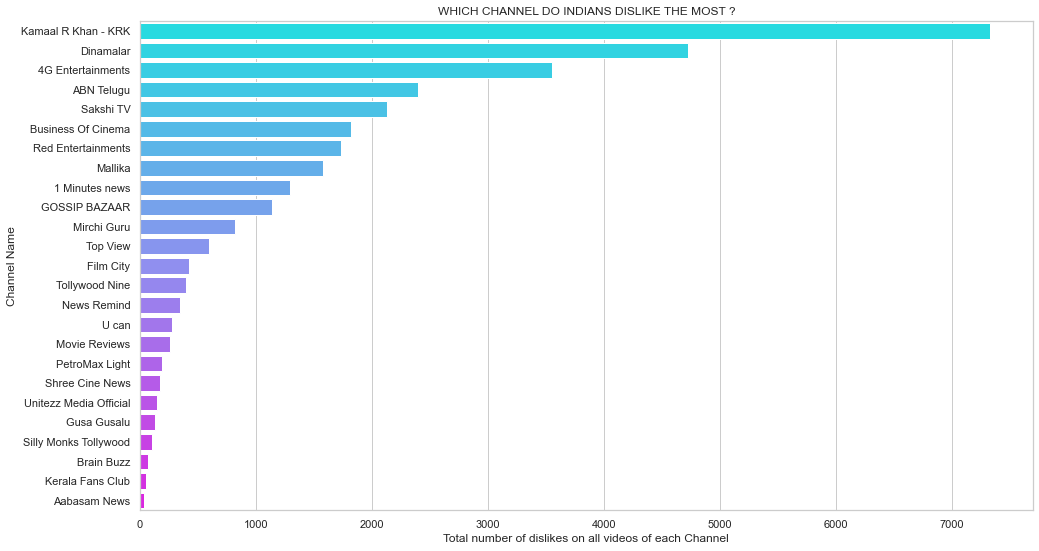

In [45]:
#List of all unique channel title
cats = df["channel_title"].unique()
#Sum of Like received on each video of various channels
vals = np.array([(df.groupby("channel_title").get_group(i)["dislikes"]-df.groupby("channel_title").get_group(i)["likes"]).sum() for i in cats])
#Soring by descending order and storing their index no.
sort = np.argsort(vals)[::-1]
#Ordering the list of cats and vals according to the indexes stored and choosing top 25 values
cats=cats[sort][:25]
vals=vals[sort][:25]
#Plotting the Bar Graph
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")
sns.barplot(vals,cats,orient='h',palette="cool")
plt.xlabel("Total number of dislikes on all videos of each Channel")
plt.ylabel("Channel Name")
plt.title("WHICH CHANNEL DO INDIANS DISLIKE THE MOST ?")
plt.show()

## **Now, Let's look at what kind of content is getting famous in India**
We will use WordCloud to visualize the the content Indians that goes trending in India.

In [46]:
from wordcloud import WordCloud, STOPWORDS
def PlotWordCloud(data,category):
    
    

    text_words = '' 
    stopwords = set(STOPWORDS)

    #Iterate through the csv file 
    for val in data[data["video_type"]==category].sort_values(by="views").reset_index(drop=True).loc[:100,"text"]:
        
        #Typecaste each val to string
        val = str(val)
        
        #Split the value 
        tokens = val.split()
        
        #Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower()
        
        text_words += " ".join(tokens)+" "
    
    text_words = text_words.replace("bit"," ").replace("http"," ").replace("https"," ").replace("com"," ").replace("youtube"," ").replace("gmail"," ").replace("ly"," ").replace("www"," ").replace("youtu"," ").replace("be"," ").replace("goo"," ")
    
    wordcloud1 = WordCloud(width = 1600, height = 900, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(text_words)

    
    
    
    
    text_words = '' 
    stopwords = set(STOPWORDS)

    #Iterate through the csv file 
    for val in data[data["video_type"]==category].sort_values(by="likes").reset_index(drop=True).loc[:100,"text"]:
        
        #Typecaste each val to string
        val = str(val)
        
        #Split the value 
        tokens = val.split()
        
        #Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower()
        
        text_words += " ".join(tokens)+" "
    
    text_words = text_words.replace("bit"," ").replace("http"," ").replace("https"," ").replace("com"," ").replace("youtube"," ").replace("gmail"," ").replace("ly"," ").replace("www"," ").replace("youtu"," ").replace("be"," ").replace("goo"," ")
    
    wordcloud2 = WordCloud(width = 1600, height = 900, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(text_words)

    
    
    
    
    
    text_words = '' 
    stopwords = set(STOPWORDS)

    #Iterate through the csv file 
    for val in data[data["video_type"]==category].sort_values(by="comment_count").reset_index(drop=True).loc[:100,"text"]:
        
        #Typecaste each val to string
        val = str(val)
        
        #Split the value 
        tokens = val.split()
        
        #Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower()
        
        text_words += " ".join(tokens)+" "
    
    text_words = text_words.replace("bit"," ").replace("http"," ").replace("https"," ").replace("com"," ").replace("youtube"," ").replace("gmail"," ").replace("ly"," ").replace("www"," ").replace("youtu"," ").replace("be"," ").replace("goo"," ")
    
    wordcloud3 = WordCloud(width = 1600, height = 900, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(text_words)
    
    #Plot the WordCloud images
    f, axarr = plt.subplots(3,1,figsize=(16,27))
    f.suptitle(f'{category}', fontsize=50)
    axarr[0].imshow(wordcloud1)
    axarr[0].axis("off")
    axarr[0].set_title('On the basis of Views',size=30)
    axarr[1].imshow(wordcloud2)
    axarr[1].axis("off")
    axarr[1].set_title('On the basis of Likes',size=30)
    axarr[2].imshow(wordcloud3)
    axarr[2].axis("off")
    axarr[2].set_title('On the basis of Comment Count',size=30)

In [47]:
df["video_type"].value_counts()

Entertainment              7725
News & Politics            2578
Music                      1273
People & Blogs             1245
Comedy                     1149
Education                   813
Film & Animation            536
Howto & Style               481
Sports                      356
Science & Technology        305
Shows                       123
Events and Motivational      73
Autos & Vehicles             34
Gaming                       22
Travel & Events               4
Movies                        2
Pets & Animals                2
Name: video_type, dtype: int64

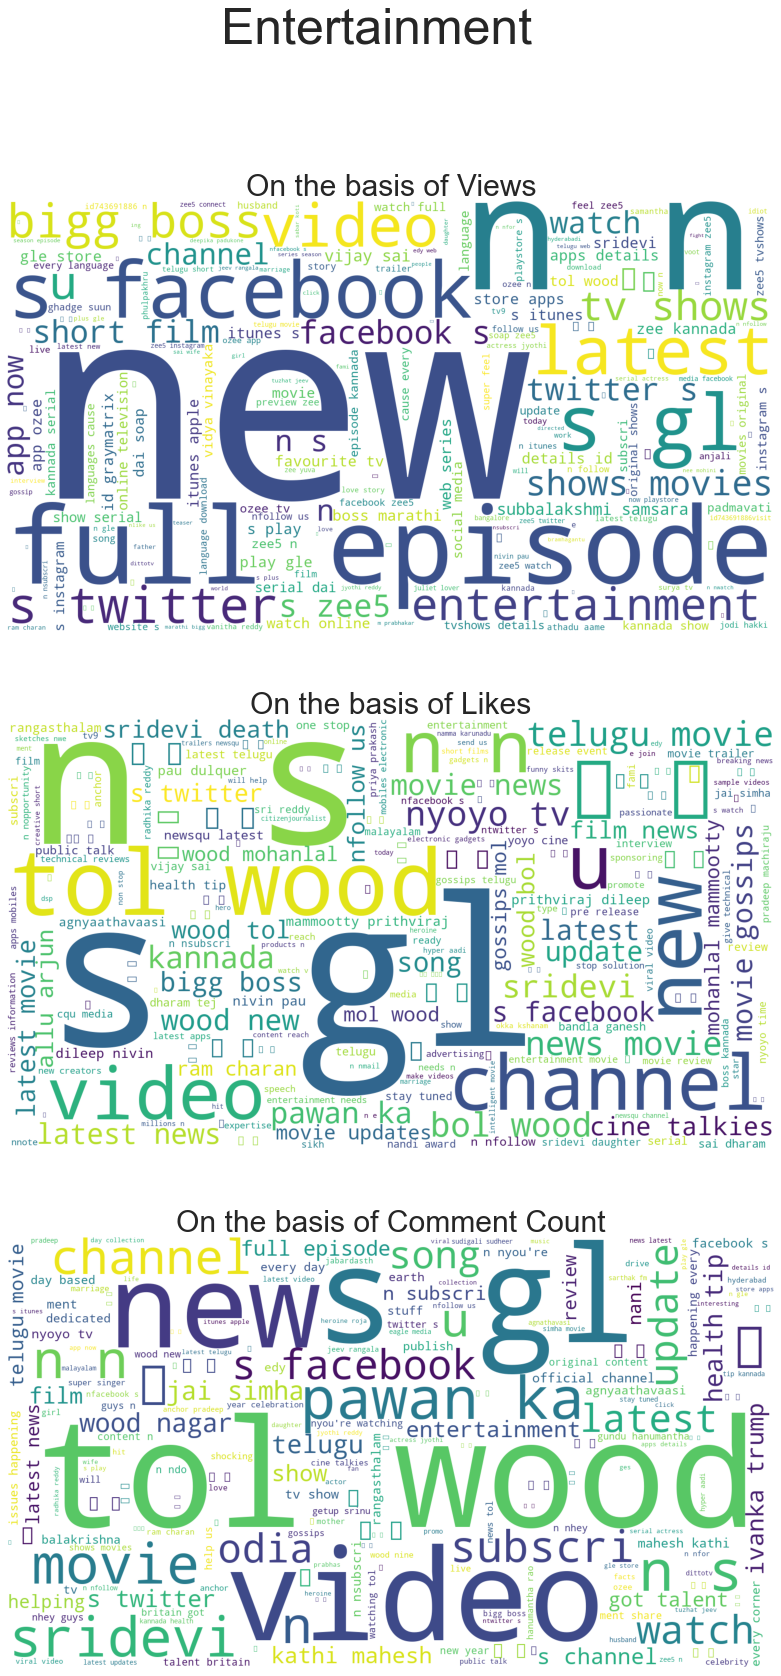

In [48]:
PlotWordCloud(df,"Entertainment")

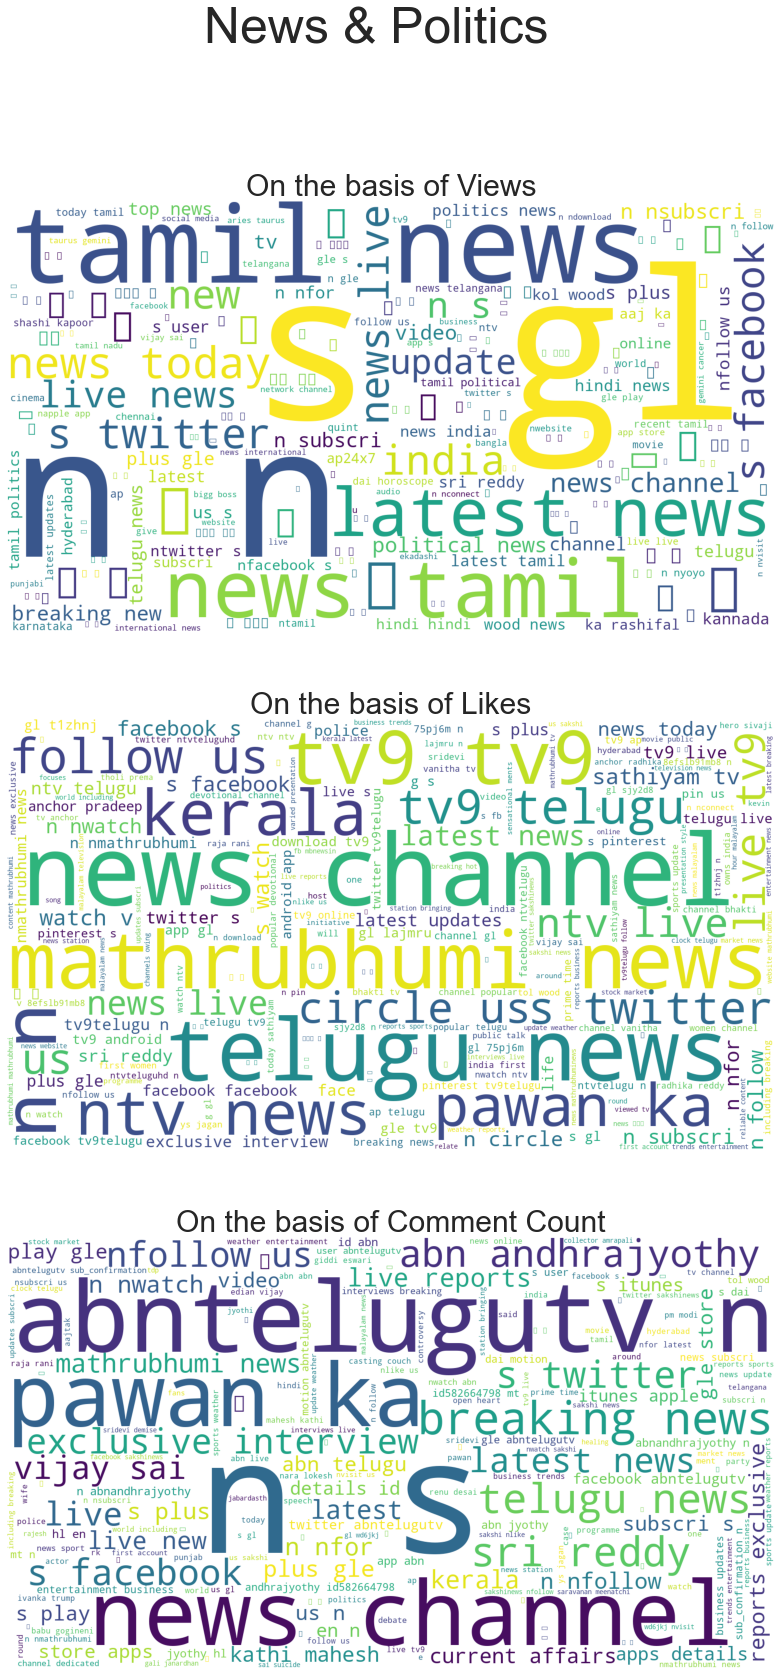

In [49]:
PlotWordCloud(df,"News & Politics")

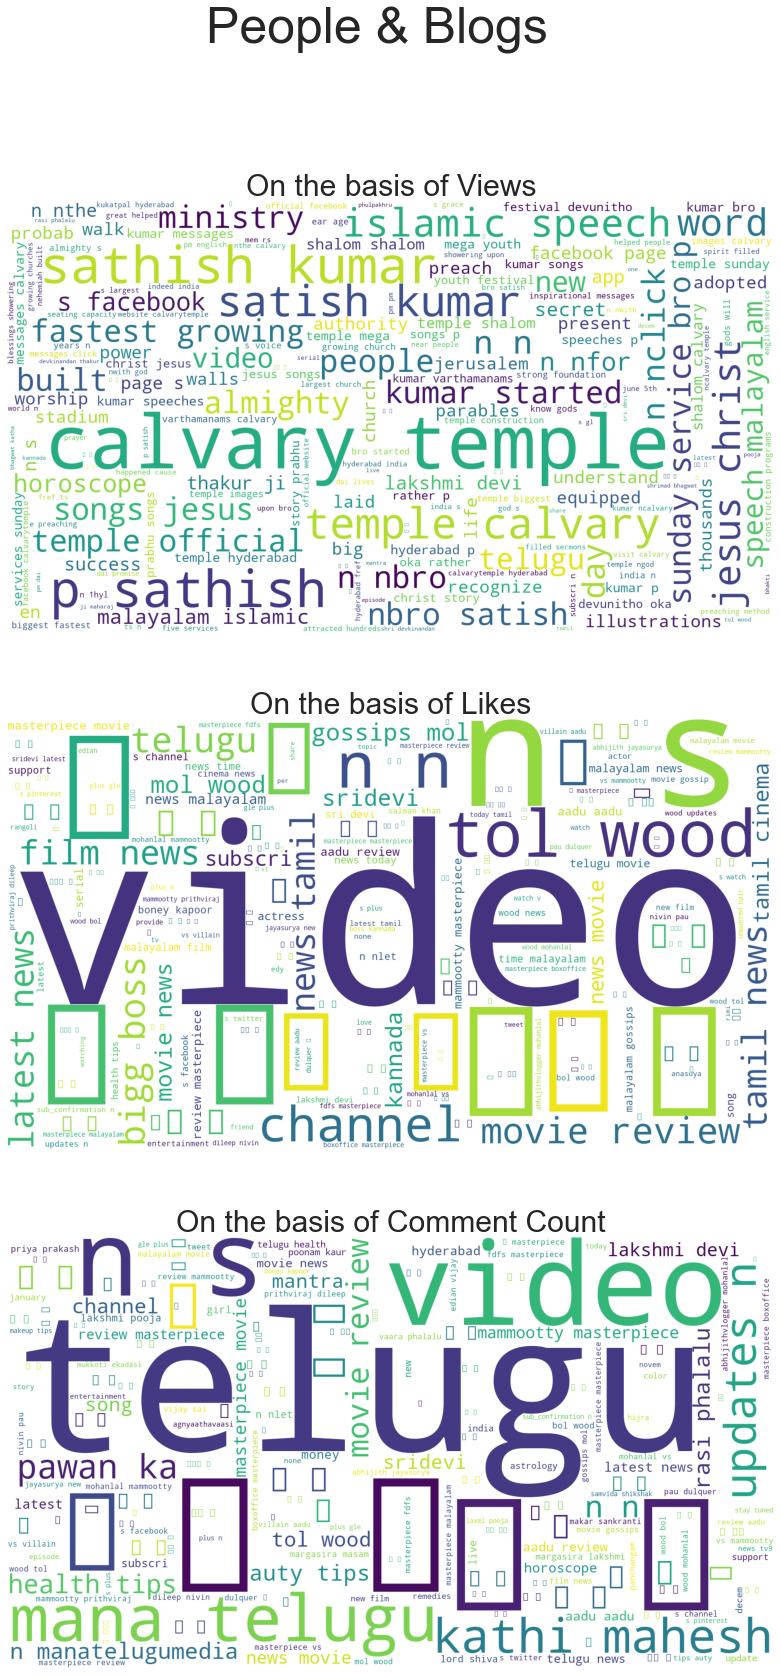

In [50]:
PlotWordCloud(df,"People & Blogs")

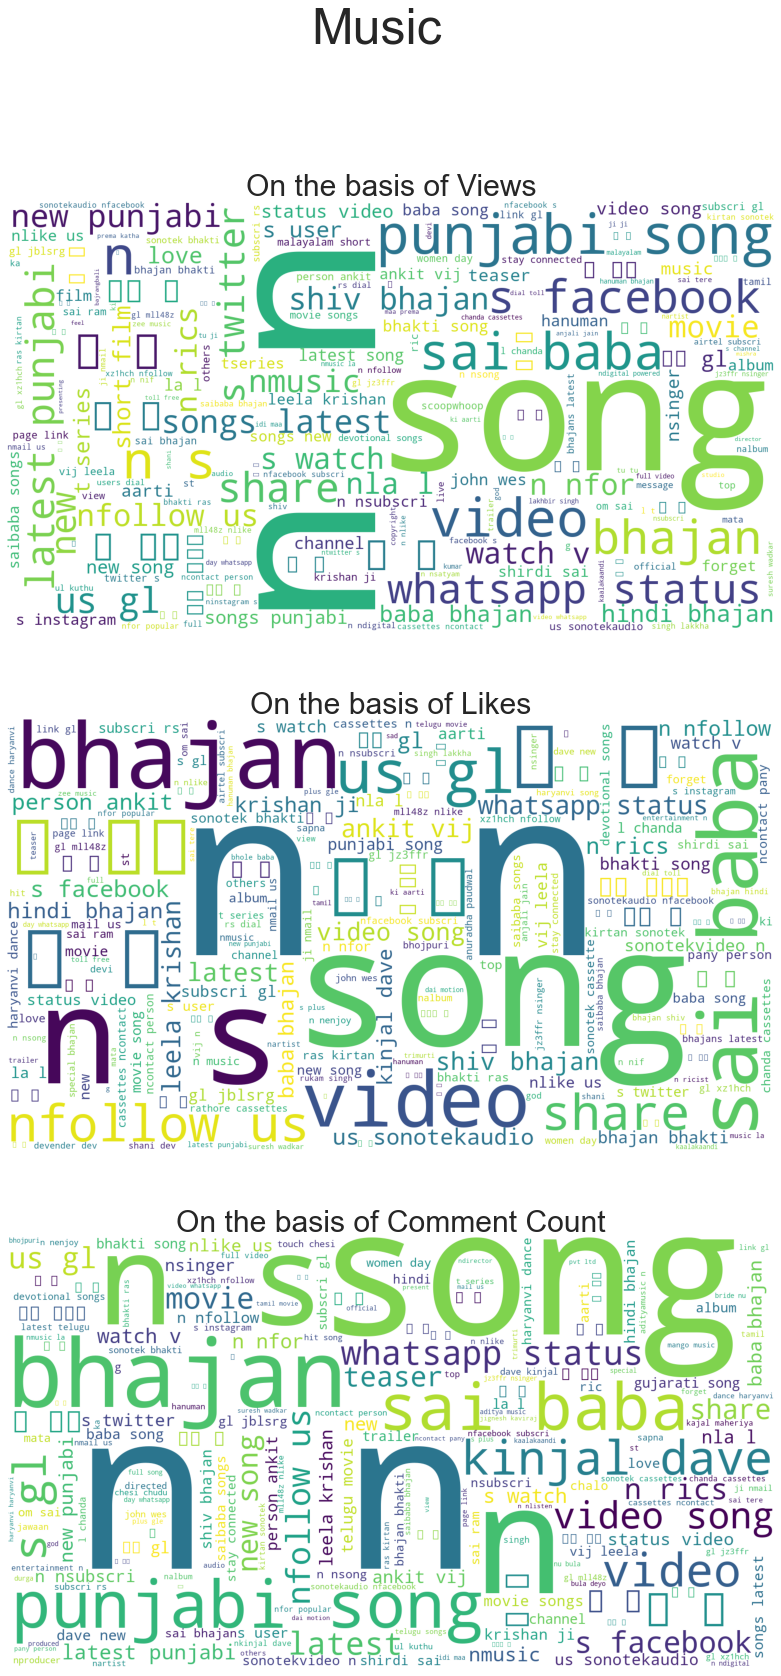

In [51]:
PlotWordCloud(df,"Music")

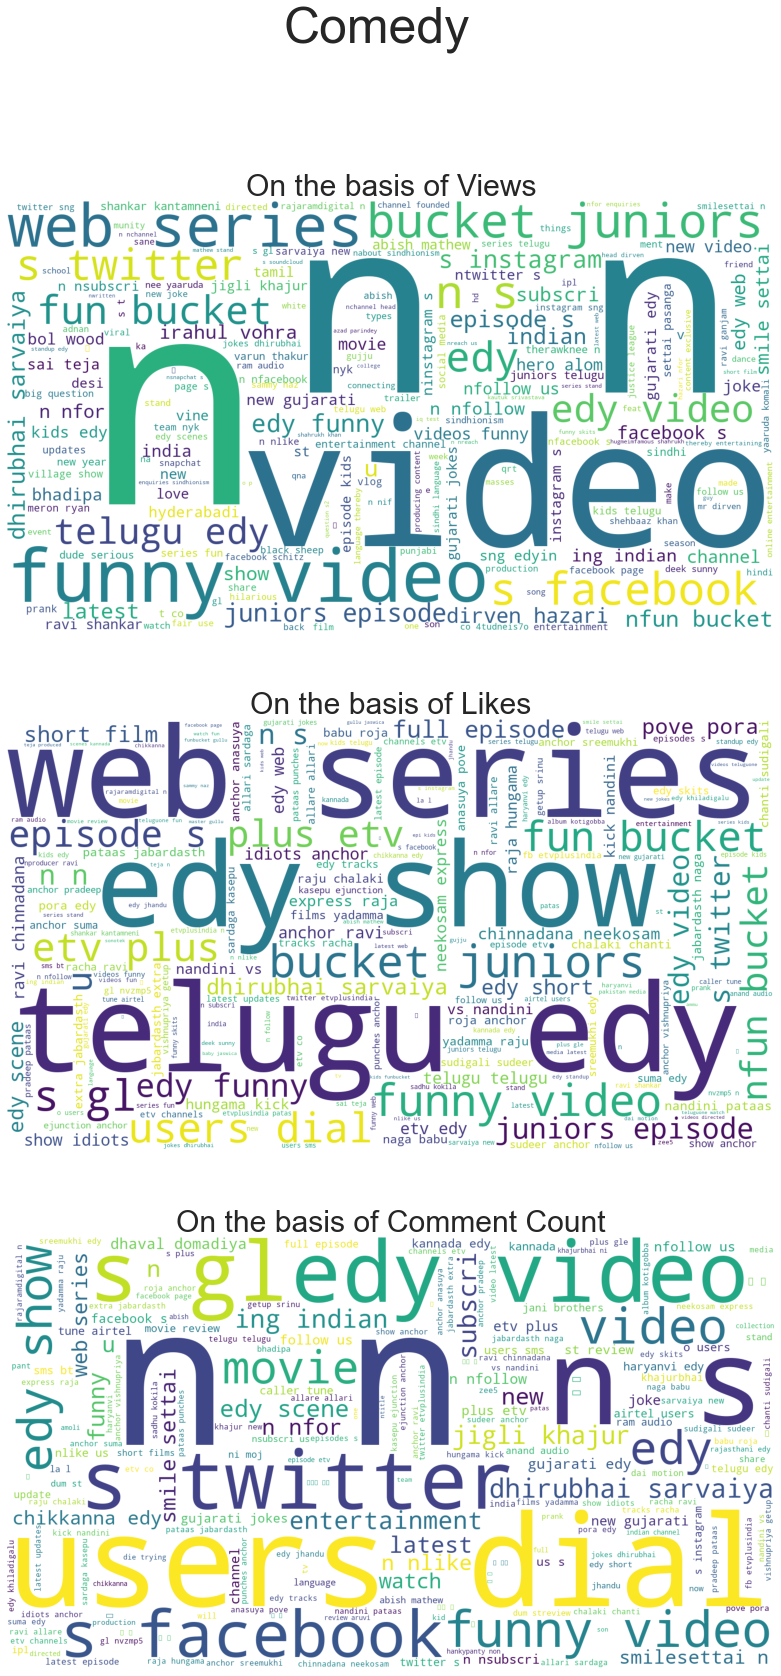

In [52]:
PlotWordCloud(df,"Comedy")

## **Let us look at the distribution of Numerical Columns divided by video_type**

In [53]:
#Creating a new dataframe that contains the log values of Views, Likes, Comment Count, Dislikes
log = pd.DataFrame({"log views":np.log(df['views']+1),"log likes":np.log(df['likes']+1),"log dislikes":np.log(df['dislikes']+1),"log comments":np.log(df['comment_count']+1),"video_type":df["video_type"]})

In [54]:
log

log views  log likes  log dislikes  log comments       video_type
0      15.559264  11.755699      8.872768      8.995165            Music
1      11.958162   6.575076      3.988984      0.000000  News & Politics
2      13.065611   7.867871      5.525453      5.164786    Entertainment
3      12.749983  10.154946      6.035481      7.962416           Comedy
4      12.866753   7.677864      7.102499      6.568078    Entertainment
...          ...        ...           ...           ...              ...
16716  12.275501   8.099251      6.003887      5.283204           Comedy
16717  12.916148   7.454141      6.171701      7.264730    Entertainment
16718  12.864421   7.104144      6.118097      6.548219    Entertainment
16719  11.777318   6.549651      4.753590      4.189655    Entertainment
16720  14.061003  10.019803      7.383989      7.095064    Entertainment

[16721 rows x 5 columns]

### **Distribution of Views by various categories**

In [55]:
sns.set_style("whitegrid")
sns.FacetGrid(log,height=7,aspect=32/9).map(sns.boxplot,x=log["video_type"],y=log["log views"],order=log["video_type"].unique(),palette="Set1").add_legend()
plt.show()

### **Distribution of Likes by various categories**

In [56]:
sns.set_style("whitegrid")
sns.FacetGrid(log,height=7,aspect=32/9).map(sns.boxplot,x=log["video_type"],y=log["log likes"],order=log["video_type"].unique(),palette="Set1").add_legend()
plt.show()

### **Distribution of Comment Count by various categories**

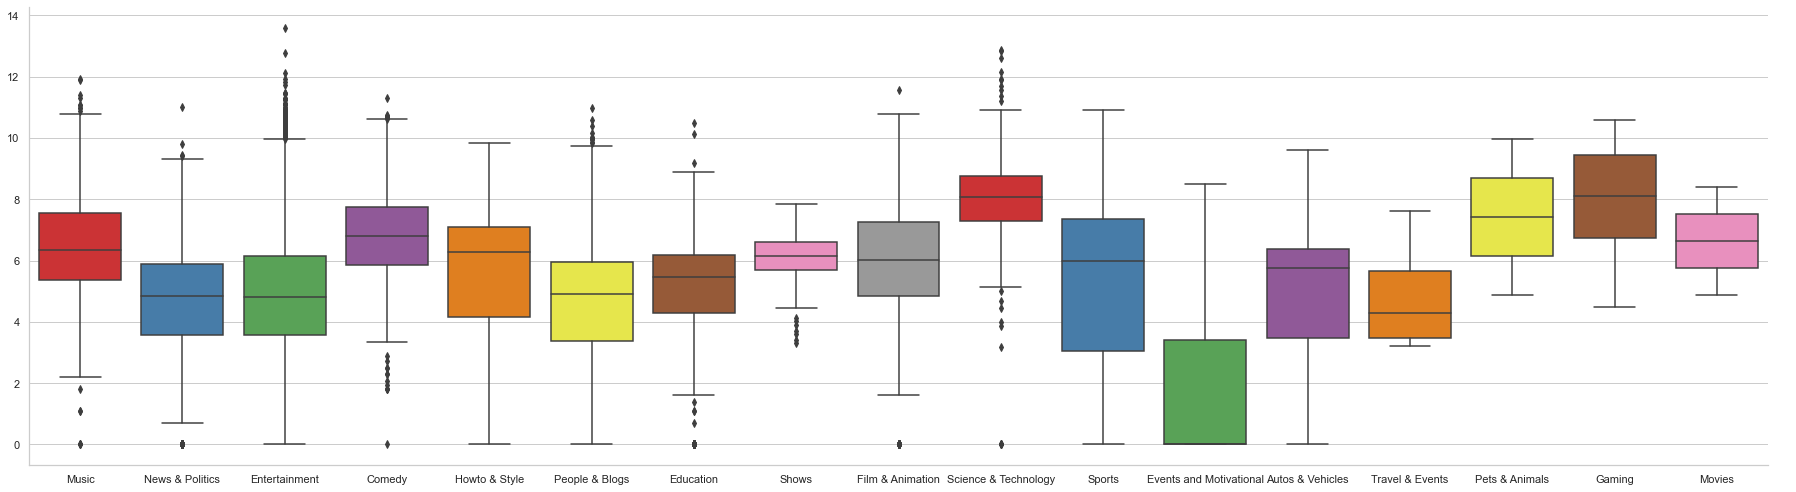

In [57]:
sns.set_style("whitegrid")
sns.FacetGrid(log,height=7,aspect=32/9).map(sns.boxplot,x=log["video_type"],y=log["log comments"],order=log["video_type"].unique(),palette="Set1").add_legend()
plt.show()

### **Distribution of Dislikes by various categories**

In [58]:
sns.set_style("whitegrid")
sns.FacetGrid(log,height=7,aspect=32/9).map(sns.boxplot,x=log["video_type"],y=log["log dislikes"],order=log["video_type"].unique(),palette="Set1").add_legend()
plt.show()

### **Distribution of trending_since(in days) by various categories**

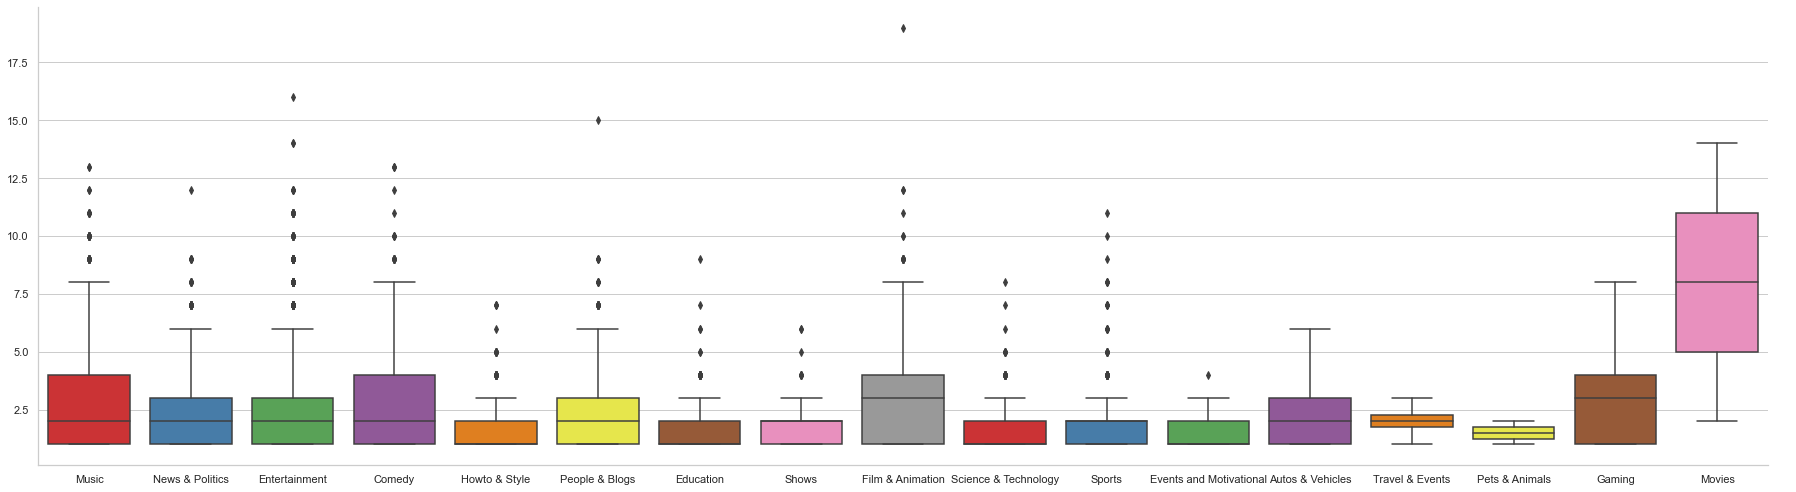

In [59]:
sns.set_style("whitegrid")
sns.FacetGrid(df,height=7,aspect=32/9).map(sns.boxplot,x=df["video_type"],y=df["trending_since(in days)"],order=log["video_type"].unique(),palette="Set1").add_legend()
plt.show()

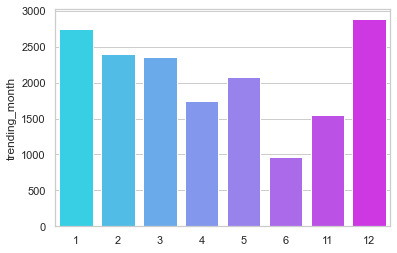

In [60]:
sns.barplot(x = np.sort(df["trending_month"].unique()),y = df["trending_month"].value_counts(sort=False),palette="cool")
plt.show()

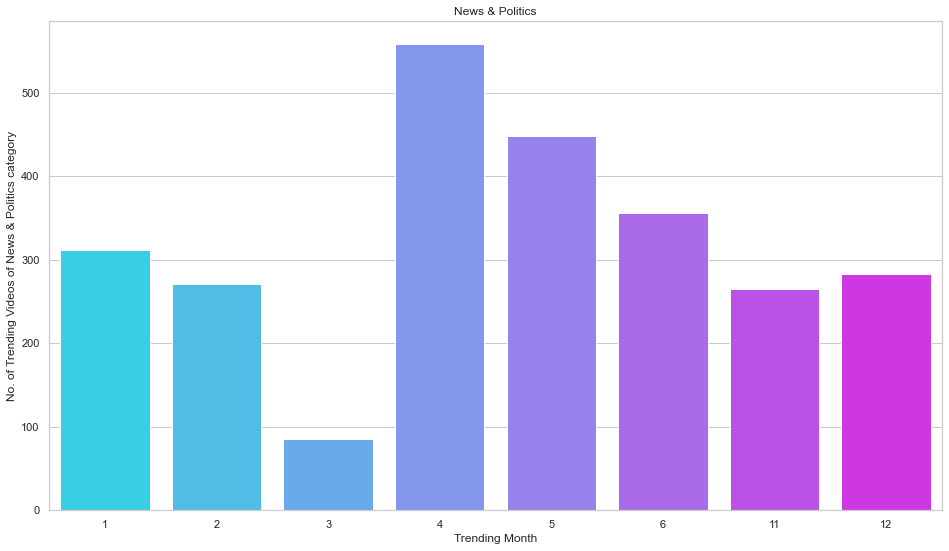

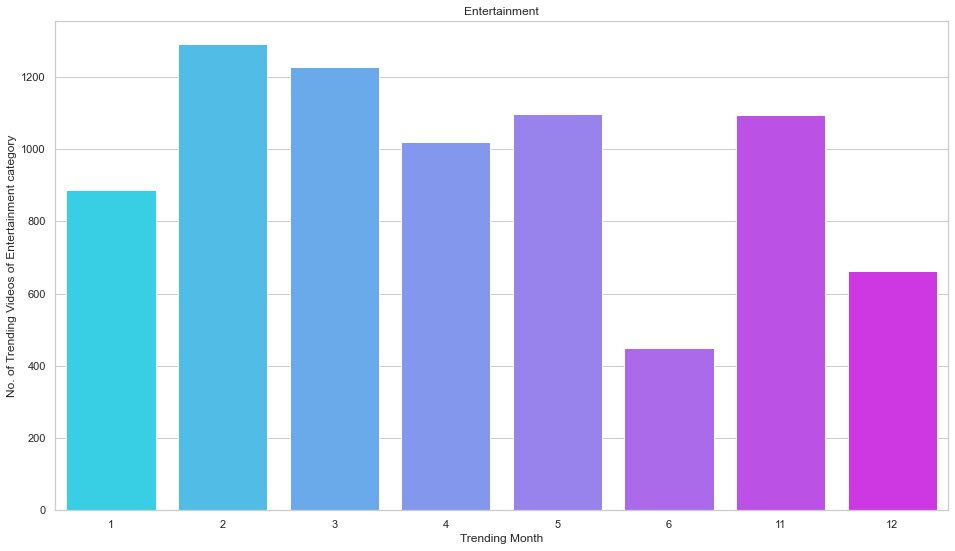

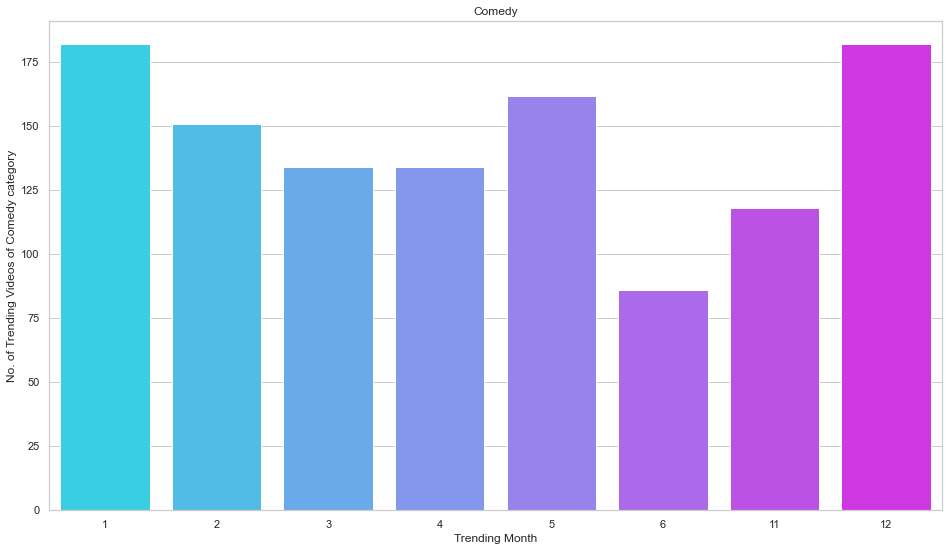

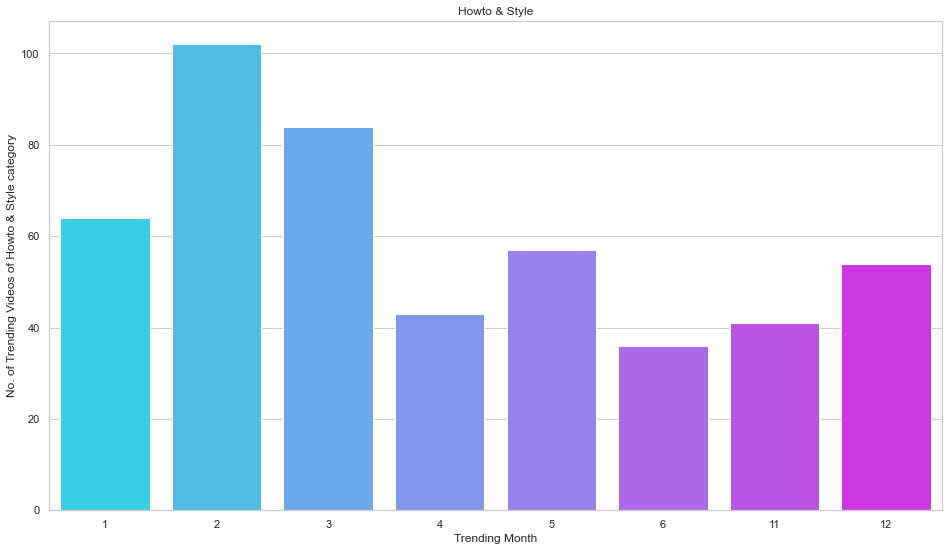

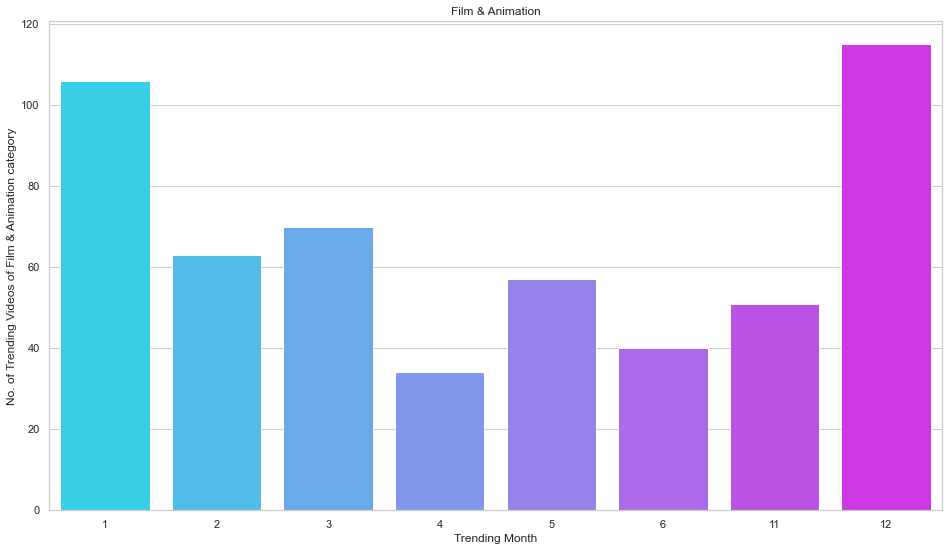

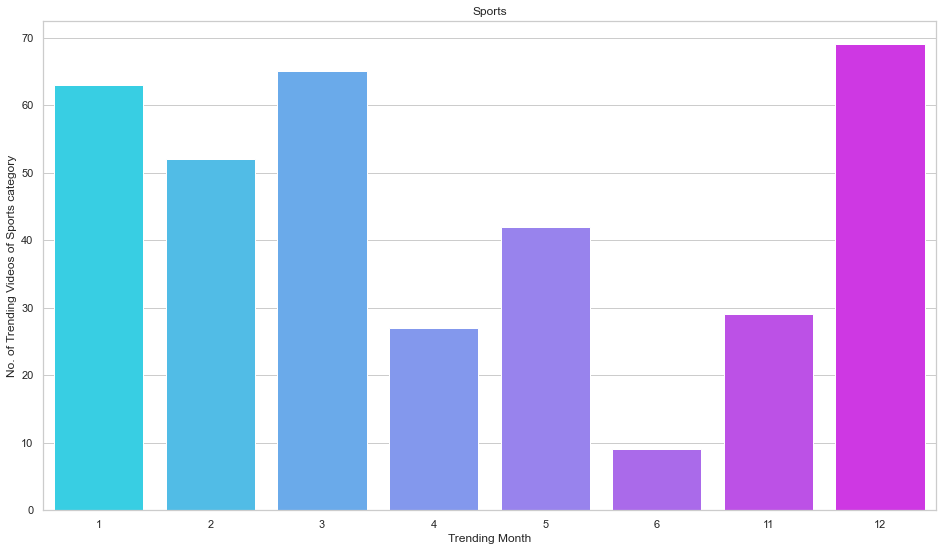

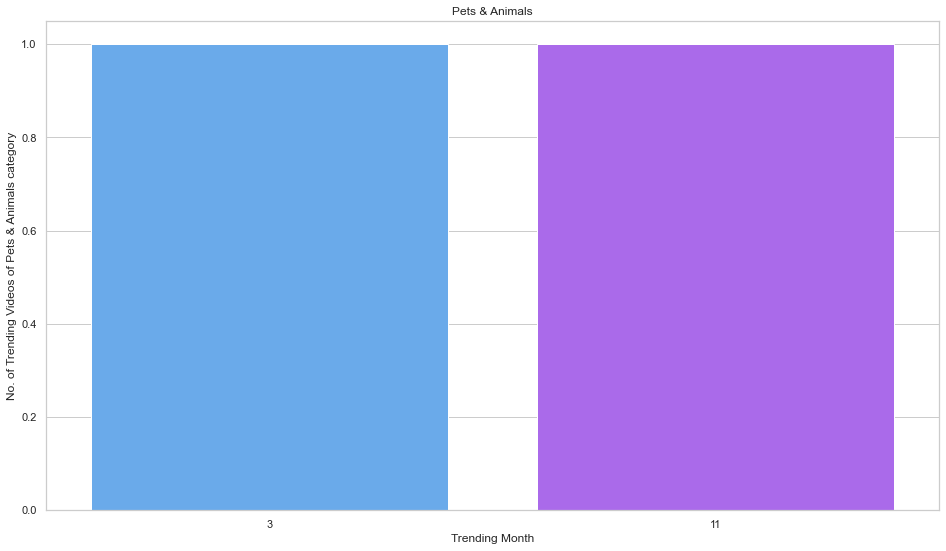

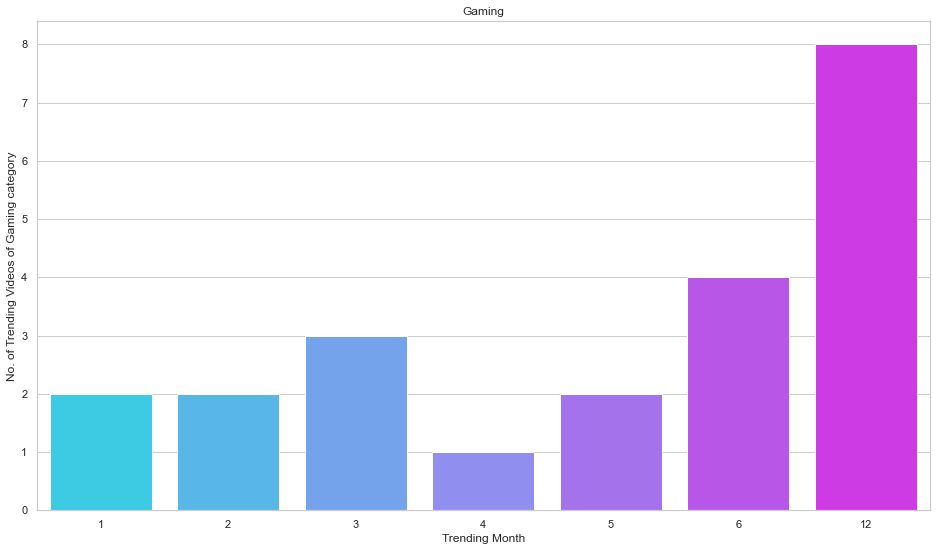

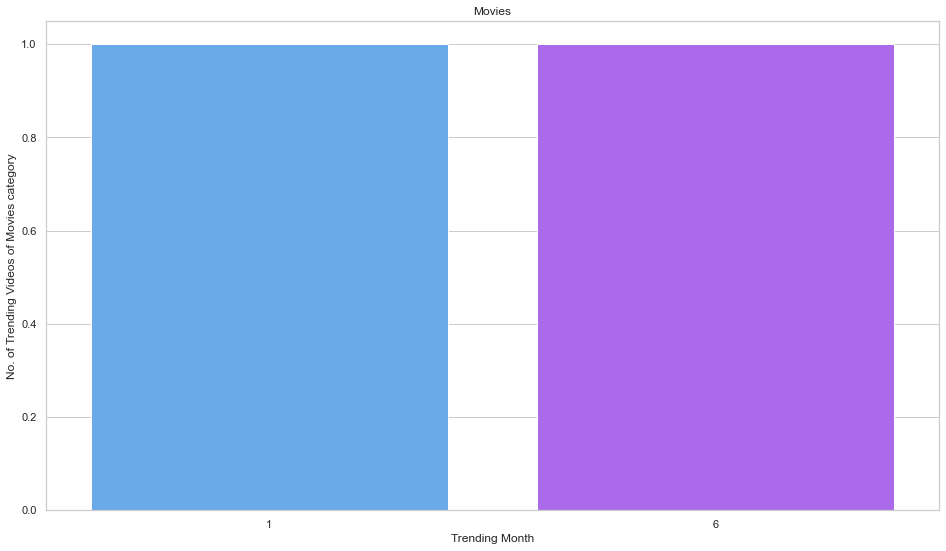

In [61]:
for i in df["video_type"].unique():
    plt.figure(figsize=(16,9))
    sns.barplot(x=np.sort(df.groupby("video_type").get_group(f"{i}")["trending_month"].unique()),y=df.groupby("video_type").get_group(f"{i}")["trending_month"].value_counts(sort=False),palette="cool")
    plt.xlabel("Trending Month")
    plt.ylabel(f"No. of Trending Videos of {i} category")
    plt.title(f"{i}")
    plt.show()

## Thank You